In [1]:
#import library yang dibutuhkan dalam clustering
import numpy as np
import math
import random
import csv
import matplotlib.pyplot as plt
from random import randint

In [2]:
def data_awal(): #membaca data awal air bnb
    temp =[]
    file = open('air_bnb.csv',encoding="utf8")
    load = csv.reader(file)
    for baris in load:
         #melakukan split data, yaitu data kolom ke 9 price dan kolom ke 13 review per mont yang digunakan
        temp.append([baris[9],baris[13]])
    return temp

In [3]:
def data_cleaning(jes):#menghapus baris yang missing atau hilang
    jum =0
    halo = jes
    pilihan = open('data_preprocesing_model-2.csv', 'w')
    jaw = csv.writer(pilihan, lineterminator='\n')
    for data in halo:
            #melakukan pengecekan apakah baris price dan review ada yang hilang
            if(data[0]=='') or (data[1]==''): 
                del (data) #jika terdapat, akan dihapus baris tersebut
            else:
                jaw.writerow(data) #jika tidak akan disimpan

                
jes = data_awal()
data_cleaning(jes)

In [4]:
from scipy import stats
import pandas as pd
def normalisasi_data(): #melakuan normalisasi data dengan Z-score Normalization
    tampung = []
    data = pd.read_csv('data_preprocesing_model-2.csv')
    hasil = stats.zscore(data) #Normalisasi data dengan Z-score Normalization
    c=len(hasil)
    for j in range(0,c):
        k= hasil[j]
        tampung.append(k)
    pilihan = open('data_preprocesing_model-2.csv', 'w') #data hasil preprocesing akan disimpan kedalam dataset.
    jaw = csv.writer(pilihan, lineterminator='\n')
    jaw.writerow(['price','reviews_per_month'])
    for data in (tampung):
        jaw.writerow(data)
normalisasi_data()

In [5]:
#membaca data hasil preprocesing untuk di clustering
datas = np.genfromtxt('data_preprocesing_model-2.csv',delimiter=',',skip_header=1 )
print(datas)

[[-0.01516995  1.74147411]
 [-0.28440209  0.18876363]
 [ 0.17266642  0.07595988]
 ...
 [-0.23431239 -0.089928  ]
 [ 0.04744217 -0.089928  ]
 [ 0.54833917  0.57362349]]


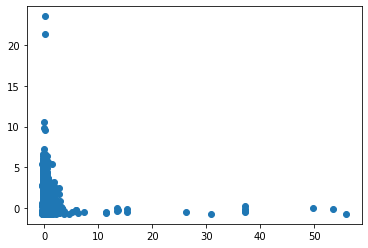

In [6]:
d_latihX = datas[:,0]
d_latihY = datas[:,1]
plt.scatter(d_latihX, d_latihY,alpha=1)
plt.show() #menampilkan sebaran dataset awal

In [7]:
def awal_centroid(k): #melakukan random centroid pada dataset.
    temp = []
    tes = [0,0]
    new_tes= []
    centroid=[]
    for i in range(0,k):
        idx_centroid= randint(0,m-1)
        centroid = datas[idx_centroid]
        if((tes)!=(centroid)).any(): #jika titik centroid tidak sama akan disimpan.
            tes = centroid
            temp.append(centroid)    
        else:
            while(tes==centroid).any(): #jika titik centroid sama makan akan dilakukan perulangan untuk menghasilkan titik yg berbeda.
                idx_centroid= randint(0,m-1)
                centroid = datas[idx_centroid]
            tes=centroid
            temp.append(tes)   
    return temp
m = len(datas)

In [8]:
def jumlah_centroid(sip): #mengelompokkan data centroid agar kedalam nilai x dan y.
    pas =sip
    print('ini pas',pas)
    tes = []
    for item in pas:
        centroid = item[0]
        tes.append(centroid)
    sip =[]
    for item in pas:
        c = item[1]
        sip.append(c)
    return tes,sip

k=3
tempC=awal_centroid(k)
awal_x,awal_y=jumlah_centroid(tempC)
print(awal_x)
print(awal_y)

ini pas [array([ 0.01613611, -0.09656351]), array([-0.18422269,  0.00296921]), array([0.73617554, 1.36988528])]
[0.016136109976653292, -0.1842226885126281, 0.7361755420475083]
[-0.09656350995302516, 0.00296921311436128, 1.3698852765731364]


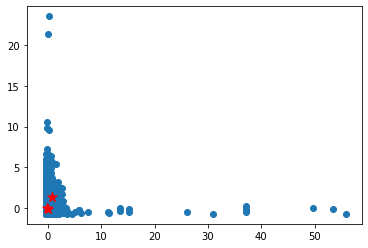

In [9]:
plt.scatter(d_latihX, d_latihY, alpha=1)
plt.scatter(awal_x, awal_y, marker = '*', s = 100,color='red')
plt.show() #menampilkan sebaran dataset dengan titik centroid

In [10]:
def euclidean_distance(a,b,x,y):#untuk menghitung jarak centroid ke objek.
    jum1 = (a-x)**2
    jum2 = (b-y)**2
    hasil = (jum1+jum2)**0.5
    return hasil

In [11]:
def list_baru(pjg): #menyimpan hasil jarak objek dengan centroid dan kelompok klaster.
    sip=[]
    for y in range(pjg):
        sip.append([0.,0.])
    return sip

In [12]:
#mendefine nilai x dan y 0,1,2 kedalam variabel yang sudah didefinisikan.
cent_x1 = awal_x[0]
cent_y1 = awal_y[0]
cent_x2 = awal_x[1]
cent_y2 = awal_y[1]
cent_x3 = awal_x[2]
cent_y3 = awal_y[2]
panjang = len(datas)
pjg = list_baru(panjang) #memanggil fungsi list untuk menampung perhitungan clustering.
hasil = np.array(list((pjg)))
def hitung_jarak():
    for i in range(0,panjang):
        p=1
        #melakukan perhitungan jarak objek ke masing2 centroid
        clust1 = euclidean_distance(cent_x1,cent_y1,datas[i,0],datas[i,1])
        clust2 = euclidean_distance(cent_x2,cent_y2,datas[i,0],datas[i,1])
        clust3 = euclidean_distance(cent_x3,cent_y3,datas[i,0],datas[i,1])
         #hasil masing2 jarak centroid ke objek akan di bandingkan untuk menentukan anggota cluster dengan jarak paling kecil.
        if (clust1 <= clust2) and (clust1 <= clust3):
            hasil[i,0] = clust1
            hasil[i,1] = 1
        if (clust2 <= clust3) and (clust2 <= clust1):
            hasil[i,0] = clust2
            hasil[i,1] = 2
        if (clust3 <= clust1) and (clust3 <= clust2):
            hasil[i,0] = clust3
            hasil[i,1] = 3
        p+=1
    return hasil

In [13]:
cent = [awal_x,awal_y]
l=1
new_cent=[]
#proses clustering akan berhenti apabila, nilai titik centroid yang baru dengan sebelumnya sama.
while(cent!=new_cent):
    jumx_C1 = 0
    jumy_C1 = 0
    jumx_C2 = 0
    jumy_C2 = 0
    jumx_C3 = 0
    jumy_C3 = 0
    count1 = 0
    count2 = 0
    count3 = 0
    sse=0
    
    hasil = hitung_jarak()
    # menjumlahkan nilai x dan y anggota masing2 di setiap cluster untuk mempermudah pencarian centroid baru
    for j in range(0,panjang):
        if(hasil[j,1]==1):
            jumx_C1 = jumx_C1+datas[j,0]
            jumy_C1 = jumy_C1+datas[j,1]
            count1 = count1+1
            sse = sse + hasil[j,0]
        elif(hasil[j,1]==2):
            jumx_C2 = jumx_C2+datas[j,0]
            jumy_C2 = jumy_C2+datas[j,1]
            sse = sse + hasil[j,0]
            count2 = count2+1
        elif(hasil[j,1]==3):
            jumx_C3 = jumx_C3+datas[j,0]
            jumy_C3 = jumy_C3+datas[j,1]
            sse = sse + hasil[j,0]
            count3 = count3+1
   
    cent_x = [cent_x1, cent_x2, cent_x3]
    cent_y = [cent_y1, cent_y2, cent_y3]
    cent = [cent_x, cent_y]
    # update centroid dengan mencari rata-rata dari koordinat data pada setiap cluster
    cent_x1 = round(jumx_C1/count1,2)
    cent_y1 = round(jumy_C1/count1,2)

    cent_x2 = round(jumx_C2/count2,2)
    cent_y2 = round(jumy_C2/count2,2)

    cent_x3 = round(jumx_C3/count3,2)
    cent_y3 = round(jumy_C3/count3,2)

    cent_x = [cent_x1, cent_x2, cent_x3]
    cent_y = [cent_y1, cent_y2, cent_y3]
  
    new_cent = [cent_x,cent_y]
    # print('new centorid {} '.format(l),new_cent)
    l=l+1
print("Cent X: ",cent_x)
print("Cent Y: ",cent_y)
print('SSE',(sse))

Cent X:  [-0.03, 0.0, 0.44]
Cent Y:  [-0.47, 0.86, 2.95]
SSE 7489.845624036661


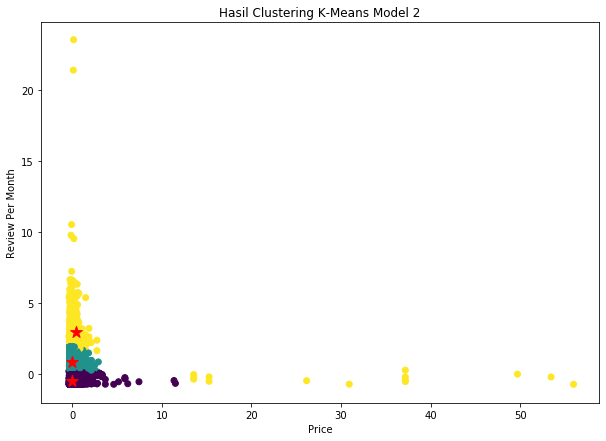

In [14]:
plt.figure(figsize=(10, 7))
#memvisualisasikan hasil clustering sesuai dengan anggota cluster yang terbentuk.
plt.scatter(d_latihX, d_latihY, c=hasil[:,1])
plt.scatter(cent_x, cent_y, marker = '*', color='red',s=150)
plt.title('Hasil Clustering K-Means Model 2')
plt.xlabel('Price')
plt.ylabel('Review Per Month')
plt.show()

In [ ]:
#menyimpan data hasil clustering kedalam csv hasil_clustering_model-2.csv
akhir = []
def hasil_akhir():
    q = len(hasil)
    for k in range(0,q):
        akhir.append([datas[k][0],datas[k][1],hasil[k][1]])
    simpan = open("hasil_clustering_model-2.csv", 'w')
    jaw = csv.writer(simpan, lineterminator='\n')
    jaw.writerow(['Price','Reviews_per_month','Kelas'])
    for data in (akhir):
        jaw.writerow(data)
    return akhir
l = hasil_akhir()
print('---Hasil Clustering Air_bnb---')
for y in l:
    print(y)